In [3]:
# ! pip install text2vec

In [1]:
import pandas as pd

In [2]:
df_gen = pd.read_csv('data/df_gen.csv', index_col=0).reset_index(drop=True)

In [3]:
from text2vec import SentenceModel
model = SentenceModel('sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2')

2023-07-20 17:56:42.341 | DEBUG    | text2vec.sentence_model:__init__:76 - Use device: cpu


In [3]:
df_gen['sample']

0        美式咖啡
1        拿鐵咖啡
2        卡布奇諾
3        摩卡咖啡
4       焦糖瑪奇朵
        ...  
2155     高粱麵包
2156     高粱麵粉
2157    高粱沙拉醬
2158     高粱醬油
2159      高粱醋
Name: sample, Length: 2160, dtype: object

In [14]:
pd.set_option('display.max_rows', 50)

{'item_type': '飲料類', 'category': '現做茶飲品', 'sample': '奶蓋紅茶'}

In [24]:
for i in df_gen.iloc[50:80].iterrows():
    print(dict(i[1]))

{'item_type': '咖啡類', 'category': '即溶咖啡', 'sample': '三得利即溶咖啡'}
{'item_type': '咖啡類', 'category': '即溶咖啡', 'sample': '立頓即溶咖啡'}
{'item_type': '咖啡類', 'category': '即溶咖啡', 'sample': '瑞穗即溶咖啡'}
{'item_type': '咖啡類', 'category': '即溶咖啡', 'sample': '味全即溶咖啡'}
{'item_type': '咖啡類', 'category': '即溶咖啡', 'sample': '健康即溶咖啡'}
{'item_type': '咖啡類', 'category': '即溶咖啡', 'sample': '葛瑞絲即溶咖啡'}
{'item_type': '咖啡類', 'category': '即溶咖啡', 'sample': '義美即溶咖啡'}
{'item_type': '咖啡類', 'category': '即溶咖啡', 'sample': '美味佳即溶咖啡'}
{'item_type': '咖啡類', 'category': '即溶咖啡', 'sample': '古早味即溶咖啡'}
{'item_type': '咖啡類', 'category': '即溶咖啡', 'sample': '雲峰即溶咖啡'}
{'item_type': '咖啡類', 'category': '咖啡相關食用品', 'sample': '咖啡機'}
{'item_type': '咖啡類', 'category': '咖啡相關食用品', 'sample': '咖啡杯'}
{'item_type': '咖啡類', 'category': '咖啡相關食用品', 'sample': '咖啡豆'}
{'item_type': '咖啡類', 'category': '咖啡相關食用品', 'sample': '咖啡濾紙'}
{'item_type': '咖啡類', 'category': '咖啡相關食用品', 'sample': '咖啡壺'}
{'item_type': '咖啡類', 'category': '咖啡相關食用品', 'sample': '咖啡機清潔劑'}
{'item_type': '咖

In [5]:
df_samples = pd.read_csv('data/samples.csv', index_col=0)

In [8]:
_df

,item_name,item_type,category
0,統一大補帖當歸鴨細麵,民生食材類,各式麵條/拌麵
1,辛香菇杯麵,民生食材類,各式麵條/拌麵
2,(V)卜蜂義式輕食沙拉胸(4℃/110g),民生食材類,各式麵條/拌麵
3,五木雞蛋麵經濟包2kg,民生食材類,各式麵條/拌麵
4,昇泰,民生食材類,各式麵條/拌麵
...,...,...,...
1584520,特大杯焦糖可可碎片星冰樂 2023-05-26 r5cr-7,冰品類,甜筒
1584521,特大杯冰椰奶那堤 2023-05-18 q1hd-rg85,冰品類,甜筒
1584522,特大杯冰椰奶那堤 2023-05-20 e5bd-7247,冰品類,甜筒
1584523,新鮮芒果西瓜牛奶綿綿冰,冰品類,甜筒


In [12]:
bad_gen_cat_1

32       濾掛式咖啡
112         茶飲
192        氣泡水
212        機能水
232        保久乳
252        調味乳
272         優格
312        發酵乳
332         豆漿
472       蒸箱食品
512         熱狗
592         漢堡
652         湯品
692        雞胸肉
752         麵包
972       冷凍海鮮
1032    冷凍微波料理
1052     保健/養生
1072        餅乾
1092        堅果
1132        豆乾
1172        海苔
1892        報紙
2092        燈具
2132        藥酒
Name: category, dtype: object

In [15]:
tmp = set(df_gen.category)
_df = df_samples[df_samples.category.apply(lambda x: x in tmp)]
_df = _df[_df['item_name'].apply(lambda x: not x.startswith('外送費'))]
_df = _df[_df['item_name'].apply(lambda x: not x.startswith('平台費'))]
_df = _df[_df['item_type'].apply(lambda x: not x.startswith('3C類'))]

bad_gen_cat_1 = df_gen[df_gen['sample'].apply(lambda x: '十三' in x)].category
bad_gen_cat_2 = df_gen[df_gen['sample'].apply(lambda x: '13' in x)].category

bad_gen_cat = set(list(bad_gen_cat_1) + list(bad_gen_cat_2))
_df = _df[_df['category'].apply(lambda x: x not in bad_gen_cat)]


tmp = set(_df['category'])
df_gen = df_gen[df_gen['category'].apply(lambda x: x in tmp)].reset_index(drop=True)
embeddings = model.encode(df_gen['sample'])

In [16]:
len(set(_df.category))

76

In [17]:
len(set(df_samples.category))

176

In [18]:
import numpy as np

In [19]:
model.encode(_df.sample(2).iloc[0]['item_name']).shape

(384,)

In [20]:
embeddings.shape

(1520, 384)

In [21]:
from sklearn.metrics.pairwise import cosine_similarity

In [22]:
_df.shape

(400255, 3)

In [23]:
sample = _df.sample(1).iloc[0]
item_name = sample['item_name']
sim = cosine_similarity(model.encode(item_name).reshape(1, -1), embeddings)
index = np.argmax(sim)
score = sim[0, index]

In [24]:
sample

item_name    贈品-麗仕柔膚香氛沐浴乳水嫩200ml 
item_type                洗浴清潔/保養類
category                  身體清潔/保養
Name: 142541, dtype: object

In [25]:
print('score', score)
df_gen.iloc[index]

score 0.70880544


item_type       乳品類
category        優酪乳
sample       百香果優酪乳
Name: 153, dtype: object

In [26]:
from collections import defaultdict

In [28]:
d = defaultdict(list)
for _ in range(10000):
    sample = _df.sample(1).iloc[0]
    item_name = sample['item_name']
    sim = cosine_similarity(model.encode(item_name).reshape(1, -1), embeddings)
    index = np.argmax(sim)
    score = sim[0, index]
    
    matched = df_gen.iloc[index]
    matched_item_type = matched['item_type']
    matched_item_category = matched['category']
    matched_item_type_sample = matched['sample']
    

    d['item_name'].append(sample['item_name'])
    d['item_type'].append(sample['item_type'])
    d['category'].append(sample['category'])
    d['score'].append(score)
    d['matched_item_type'].append(matched_item_type)
    d['matched_item_category'].append(matched_item_category)
    d['matched_item_type_sample'].append(matched_item_type_sample)

In [29]:
df = pd.DataFrame.from_dict(d)

In [30]:
(df['item_type'] == df['matched_item_type']).sum()

3310

In [31]:
df

,item_name,item_type,category,score,matched_item_type,matched_item_category,matched_item_type_sample
0,剪髮染髮斗篷1入-理髮圍布大人 小孩都可使用 可超取 開發票,洗浴清潔/保養類,髮部清潔/保養,0.688944,日用百貨類,家庭清潔用品,護髮素
1,名湯百景入浴劑25g乳頭,洗浴清潔/保養類,身體清潔/保養,0.726613,日用百貨類,家庭清潔用品,沐浴乳
2,蕃茄醬2包、胡椒粉,民生食材類,料理調味,0.809949,民生食材類,料理調味,胡椒粉
3,🔥🔥🔥台灣現貨🇹🇼LED 粒仔火 網標燈 信號燈,家電類,生活家電,0.682017,戶外休閒用品類,戶外露營,燈具
4,黃金 原味雞腿排 泰式雞腿排 無骨 去骨 雞腿排 210g/,冷凍食品類,冷凍肉品,0.648181,生鮮食品類,生鮮肉品,雞腿
...,...,...,...,...,...,...,...
9995,BeBeLock 鉑金TOK副食品連裝盒 15ml (四色可,日用百貨類,餐廚用品,0.604897,冷凍食品類,冷凍水餃/點心類,冷凍韭菜盒子
9996,【🔥台灣24H出貨🔥】玻璃杯 馬克杯 杯子 雙層玻璃杯,日用百貨類,餐廚用品,0.596858,日用百貨類,民生紙品,紙杯
9997,【綠綠好日】適用 小米 4Pro 抗菌HEPA濾芯 複合 顆,家電類,生活家電,0.532131,日用百貨類,家庭清潔洗劑,威露士消毒液
9998,【現貨 免運】 珪藻土杯墊 方/圓/素色 桌面必備 吸水杯墊,日用百貨類,餐廚用品,0.655542,洗浴清潔/保養類,女性衛生用品,卫生巾垫


In [58]:
1/len(set(df['item_type']))

0.05555555555555555

In [59]:
1/len(set(df['category']))

0.01818181818181818

In [49]:
(df['category'] == df['matched_item_category']).sum()

1469

In [50]:
len(set(df['category']))

55

In [51]:
df_c = df[df['category'] == df['matched_item_category']]
df_f = df[df['category'] != df['matched_item_category']]

In [52]:
df_c

,item_name,item_type,category,score,matched_item_type,matched_item_category,matched_item_type_sample
2,蕃茄醬2包、胡椒粉,民生食材類,料理調味,0.809949,民生食材類,料理調味,胡椒粉
6,香辣豆瓣拌麵,民生食材類,各式麵條/拌麵,0.985711,民生食材類,各式麵條/拌麵,酸辣豆花拌麵
13,PANTENE 奇蹟煥活根源護髮精華素,洗浴清潔/保養類,髮部清潔/保養,0.783388,洗浴清潔/保養類,髮部清潔/保養,頭皮保濕護髮水
24,天仁茉香綠茶,飲料類,沖泡類飲品,0.967680,飲料類,沖泡類飲品,烏龍茶
25,【VENCEDOR】收納箱 收納櫃 可折疊抽取收納箱 抽屜式,傢俱/家飾類,傢俱,0.758251,傢俱/家飾類,傢俱,櫥櫃
...,...,...,...,...,...,...,...
9968,Saholea森歐黎漾 淨平衡洋甘菊輕感護髮素480ml,洗浴清潔/保養類,髮部清潔/保養,0.606439,洗浴清潔/保養類,髮部清潔/保養,頭皮平衡護髮水
9978,【DAIKIN 大金】大關U系列5-7坪變頻冷暖分離式冷氣(,家電類,大型家電,0.687696,家電類,大型家電,空調
9979,可口可樂汽水,飲料類,碳酸/汽水,0.906113,飲料類,碳酸/汽水,可口可樂
9984,【Pril 淨麗】小蘇打高效/植純萃洗碗精 1000ml(檸,日用百貨類,家庭清潔洗劑,0.734789,日用百貨類,家庭清潔洗劑,賽寶洗碗精


In [53]:
df_f

,item_name,item_type,category,score,matched_item_type,matched_item_category,matched_item_type_sample
0,剪髮染髮斗篷1入-理髮圍布大人 小孩都可使用 可超取 開發票,洗浴清潔/保養類,髮部清潔/保養,0.688944,日用百貨類,家庭清潔用品,護髮素
1,名湯百景入浴劑25g乳頭,洗浴清潔/保養類,身體清潔/保養,0.726613,日用百貨類,家庭清潔用品,沐浴乳
3,🔥🔥🔥台灣現貨🇹🇼LED 粒仔火 網標燈 信號燈,家電類,生活家電,0.682017,戶外休閒用品類,戶外露營,燈具
4,黃金 原味雞腿排 泰式雞腿排 無骨 去骨 雞腿排 210g/,冷凍食品類,冷凍肉品,0.648181,生鮮食品類,生鮮肉品,雞腿
5,🏠好來屋🏠WELLS LAMONT 美國尺寸工作手套十雙,家電類,生活家電,0.609391,戶外休閒用品類,行李箱/配件,配件10
...,...,...,...,...,...,...,...
9995,BeBeLock 鉑金TOK副食品連裝盒 15ml (四色可,日用百貨類,餐廚用品,0.604897,冷凍食品類,冷凍水餃/點心類,冷凍韭菜盒子
9996,【🔥台灣24H出貨🔥】玻璃杯 馬克杯 杯子 雙層玻璃杯,日用百貨類,餐廚用品,0.596858,日用百貨類,民生紙品,紙杯
9997,【綠綠好日】適用 小米 4Pro 抗菌HEPA濾芯 複合 顆,家電類,生活家電,0.532131,日用百貨類,家庭清潔洗劑,威露士消毒液
9998,【現貨 免運】 珪藻土杯墊 方/圓/素色 桌面必備 吸水杯墊,日用百貨類,餐廚用品,0.655542,洗浴清潔/保養類,女性衛生用品,卫生巾垫


In [48]:
df_f[df_f['score']>0.8]

,item_name,item_type,category,score,matched_item_type,matched_item_category,matched_item_type_sample
9,檸檬馬鞭草液態皂,洗浴清潔/保養類,身體清潔/保養,0.822758,冰品類,甜筒,檸檬甜筒
23,一配明太子龍蝦風味沙拉飯糰,鮮食類,米飯類,0.852315,民生食材類,各式麵條/拌麵,榨菜肉絲麵
26,妮維雅男士極淨刮鬍泡,洗浴清潔/保養類,男性用品/保養,0.832793,日用百貨類,衛浴用品,刮鬍刀
61,家樂福 薄荷沐浴乳 2000ml【家樂福】,洗浴清潔/保養類,身體清潔/保養,0.837991,日用百貨類,嬰幼兒用品,奶瓶溫奶器
81,素面沐浴澡巾,洗浴清潔/保養類,身體清潔/保養,0.925708,洗浴清潔/保養類,女性衛生用品,卫生湿巾
...,...,...,...,...,...,...,...
9895,扁蒲(梨仔),生鮮食品類,生鮮水果,0.876274,民生食材類,果醬/抹醬,火龍果醬
9917,【現貨】極致無痕收邊純色腰頭四角褲 無痕內褲 四角褲 四角褲,服飾鞋包類,男女內著,0.810559,洗浴清潔/保養類,女性衛生用品,卫生内裤
9926,團Lotte杏巧脆皮雪糕,冰品類,冰棒/雪糕,0.878957,鮮食類,麵食類,麻辣炒年糕
9930,紀文 鱈寶,生鮮食品類,生鮮肉品,0.839144,民生食材類,南北乾貨/雜糧食材,黑藜


In [38]:
from matplotlib import pyplot as plt

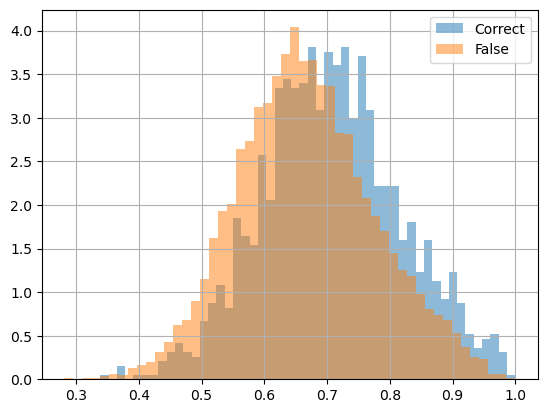

In [42]:
df_c.score.hist(density=True, bins=50, alpha=0.5, label='Correct')
df_f.score.hist(density=True, bins=50, alpha=0.5, label='False')
plt.legend()